# An Introduction to the `boostsrl` Python Package

Alexander L. Hayes &mdash; Ph.D. Student &mdash; University of Texas at Dallas  
STARAI Lab &mdash; Professor Sriraam Natarajan  
email: [Alexander.Hayes@utdallas.edu](mailto:Alexander.Hayes@utdallas.edu)  
GitHub: [https://github.com/batflyer/boostsrl-python-package](https://github.com/batflyer/boostsrl-python-package)  

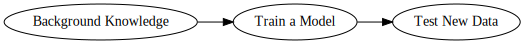

In [1]:
from graphviz import Source
src = Source('digraph "boostsrl_java design philosophy" { rankdir=LR; "Background Knowledge" -> "Train a Model" -> "Test New Data"}')
src

`boostsrl` works like a waterfall: subsequent sections are built on the previous. **Training a model** requires **background knowledge** in the same way that testing new data requires having a **trained model**. At any point it should be possible to determine why something is a certain way by following the chain back to the beginning.

### Initial Setup

**Requirements:**
  * Linux environment
  * Java 1.8  
    `$ java -version`  
  * Python (2.6, 2.7, 3.3, 3.4, 3.5, 3.6)  
    `$ python --version`  
  * Python packages: subprocess32 (for Python 2), graphviz-0.8  
    `$ pip freeze | grep "subprocess32\|graphviz"`  
  
**Recommended:**
  * Anaconda
  
**Installation:**
  * `pip install git+git://github.com/batflyer/boostsrl-python-package.git`
  
### Getting Started

In [2]:
# Let's start by importing the package
from boostsrl import boostsrl
from __future__ import print_function

**Background Knowledge** can be specified in a way similar to how we are accustomed to seeing it. Instead of directly writing it to a background file, it created as a list of strings.

In [3]:
bk = [
    'cancer(+Person).',
    'friends(+Person, -Person).',
    'friends(-Person, +Person).',
    'smokes(+Person).'
]

# Let's create a background object:
# target should be a list of strings (to handle cases with multiple targets)
target = ['cancer']
background_knowledge = boostsrl.modes(bk, target, useStdLogicVariables=True, treeDepth=4, nodeSize=2)

Since we've constructed **background knowledge** as an object, later we will be able to extract whatever information we may be interested in.

### Training a Model

Our next focus should be *creating the data*. Depending on your needs, this could just as easily be imported from a file or created with a simulator for *reinforcement learning* domains.

In [4]:
train_pos = ['cancer(Alice).', 'cancer(Bob).', 'cancer(Chuck).', 'cancer(Fred).']
train_neg = ['cancer(Dan).','cancer(Earl).']
train_facts = [
    'friends(Alice, Bob).', 'friends(Alice, Fred).', 'friends(Chuck, Bob).',
    'friends(Chuck, Fred).', 'friends(Dan, Bob).', 'friends(Earl, Bob).',
    'friends(Bob, Alice).', 'friends(Fred, Alice).', 'friends(Bob, Chuck).',
    'friends(Fred, Chuck).', 'friends(Bob, Dan).', 'friends(Bob, Earl).',
    'smokes(Alice).', 'smokes(Chuck).', 'smokes(Bob).'
]

# Let's train our model:
model = boostsrl.train(background_knowledge, train_pos, train_neg, train_facts)

# Perhaps we are interested in how many seconds it took to train.
print(model.traintime())

0.612


**We now have a _trained model_, we can even see the trees!**

In [5]:
# The 0th tree is generally the most interpretable.
print(model.tree(0, 'cancer'))

setParam: stringsAreCaseSensitive = true.

useStdLogicNotation: true.


(smokes(a) => cancer(a, 0.8581489350995121)).
cancer(_, 0.19148226843284552) /* #neg=2 #pos=1 */ .



In [6]:
# Subsequent trees seek to fit the error of those previous, so they'll sometimes be less so.
print(model.tree(1, 'cancer'))

setParam: stringsAreCaseSensitive = true.

useStdLogicNotation: true.


(smokes(a) => cancer(a, 0.7194734122109545)).
cancer(_, 0.16653882456488175) /* #neg=2 #pos=1 */ .



In **jupyter notebooks**, it's easy to see what these trees look like when rendered as an image.

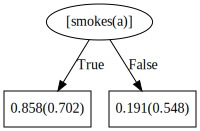

In [7]:
# In Jupyter notebooks an image can be returned. Make sure you have graphviz installed!
#    If errors occur, it's likely that the binaries cannot be found.
#    After 'pip install graphviz', do 'conda install graphviz'
model.tree(0, 'cancer', image=True)

### Testing our Model on New Data

In [8]:
test_pos = ['cancer(Zod).', 'cancer(Xena).', 'cancer(Yoda).']
test_neg = ['cancer(Voldemort).', 'cancer(Watson).']
test_facts = ['friends(Zod, Xena).', 'friends(Xena, Watson).', 'friends(Watson, Voldemort).',
              'friends(Voldemort, Yoda).', 'friends(Yoda, Zod).', 'friends(Xena, Zod).', 
              'friends(Watson, Xena).', 'friends(Voldemort, Watson).',
              'friends(Yoda, Voldemort).', 'friends(Zod, Yoda).',
              'smokes(Zod).', 'smokes(Xena).', 'smokes(Yoda).'
             ]

# We'll create a test object, using the trained model and the data above.
results = boostsrl.test(model, test_pos, test_neg, test_facts)

### Measuring Performance

In [9]:
# Summarize results returns a dictionary so it is easy to check a specific value.
results_dict = results.summarize_results()

for key in results_dict:
    print(key, ':', results_dict[key])

CLL : -0.223184
F1 : 1.000000
Recall : 1.000000
Precision : 1.000000,0.500
AUC ROC : 1.000000
AUC PR : 1.000000


In [10]:
inference_results_dict = results.inference_results('cancer')

for key in inference_results_dict:
    print(key, ':', inference_results_dict[key])

!cancer(Watson) : 0.692417902402
cancer(Xena) : 0.880796191769
!cancer(Voldemort) : 0.692417902402
cancer(Yoda) : 0.880796191769
cancer(Zod) : 0.880796191769
